In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando o dataset

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Análise exploratória

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64


Análise das variáveis

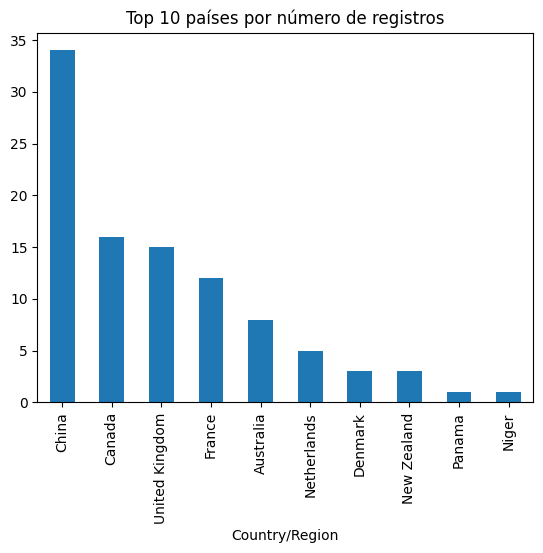

In [13]:
country_counts = df['Country/Region'].value_counts()
country_counts.head(10).plot(kind='bar', title='Top 10 países por número de registros')
plt.show()

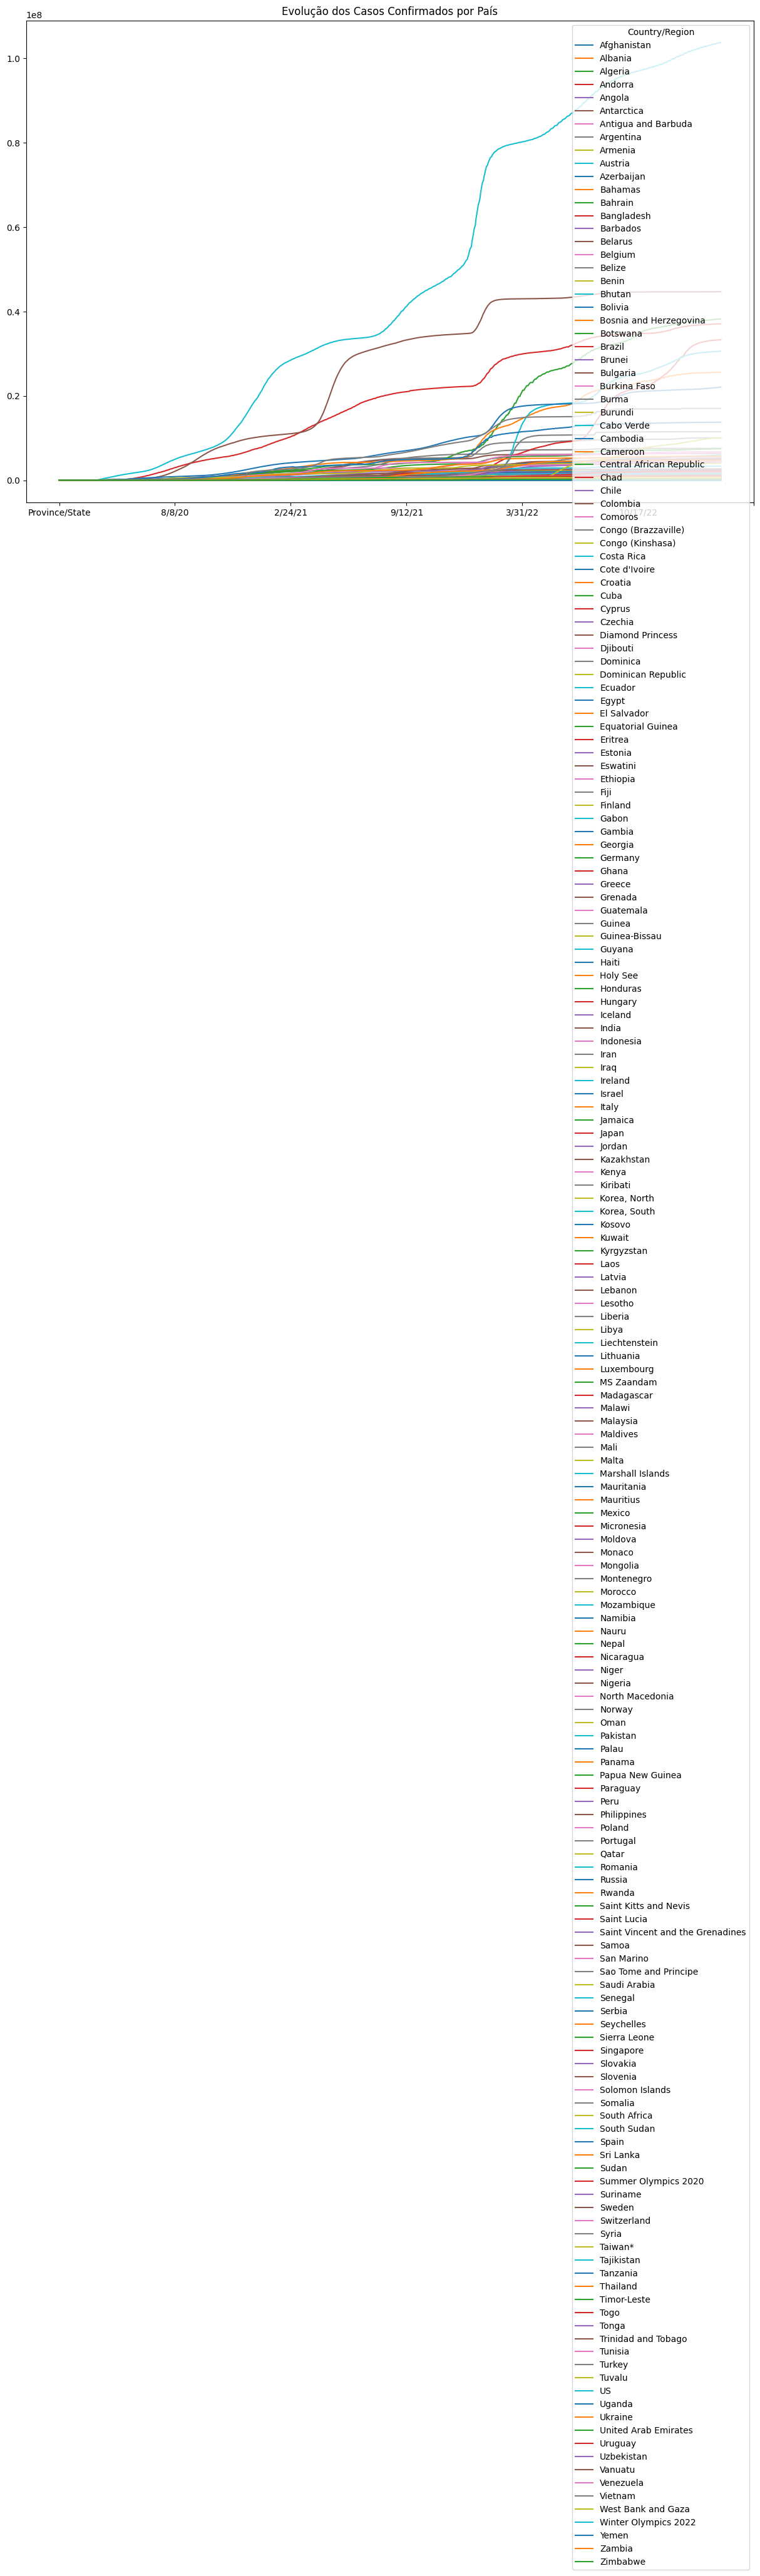

In [10]:
df_sum = df.groupby('Country/Region').sum().drop(columns=['Lat', 'Long']).T
df_sum.plot(figsize=(15, 10))
plt.title('Evolução dos Casos Confirmados por País')
plt.show()

Criação do dicionário de dados

In [12]:
data_dict = {
    'Variaveis': ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed'],
    'Tipo': ['Categórico', 'Categórico', 'Numérico', 'Numérico', 'Data', 'Numérico'],
    'Descrição': [
        'Província ou estado onde o caso foi reportado',
        'País ou região onde o caso foi reportado',
        'Latitude da localização reportada',
        'Longitude da localização reportada',
        'Data do registro',
        'Número total de casos confirmados até a data do registro'
    ],
    'Observações': [
        'Pode ser nulo para alguns registros',
        'Inclui nomes de países e regiões específicas',
        'Utilizado para mapeamento geoespacial',
        'Utilizado para mapeamento geoespacial',
        'No formato AAAA-MM-DD',
        'Atualizado diariamente'
    ]
}

data_dict_df = pd.DataFrame(data_dict)
data_dict_df


,Variaveis,Tipo,Descrição,Observações
0,Province/State,Categórico,Província ou estado onde o caso foi reportado,Pode ser nulo para alguns registros
1,Country/Region,Categórico,País ou região onde o caso foi reportado,Inclui nomes de países e regiões específicas
2,Lat,Numérico,Latitude da localização reportada,Utilizado para mapeamento geoespacial
3,Long,Numérico,Longitude da localização reportada,Utilizado para mapeamento geoespacial
4,Date,Data,Data do registro,No formato AAAA-MM-DD
5,Confirmed,Numérico,Número total de casos confirmados até a data d...,Atualizado diariamente
